In [91]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import numpy as np
import tsplib95
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from ant_colony import ant_colony

from utils.generate_tsp import generate_tsp
from utils.generate_atsp import generate_atsp
from utils.create_distance_matrix import create_distance_matrix

from data.opt_cost import tsp
from data.opt_cost import atsp
from utils.get_opt_cost import get_optimal_cost

In [93]:
# generate_tsp(n=300)
problem_type = 'tsp'
problems = []
distance_matrices = {}

for prob in problems:
    problem = tsplib95.load(f'../data/ALL_{problem_type}/{prob}.{problem_type}')
    distance_matrices[prob] = create_distance_matrix(problem)


In [94]:
optimal_costs = {}
for prob in problems:
    optimal_costs[prob] = get_optimal_cost(tsp.data, prob)

In [95]:
def plot_iterations(iteration_distances_dict, optimal_costs, problem_sizes):
    plt.figure(figsize=(10, 6))

    # Sort problem sizes by their values
    sorted_problem_sizes = dict(sorted(problem_sizes.items(), key=lambda item: item[1]))
    colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_problem_sizes)))

    for i, (prob, iteration_distances) in enumerate(iteration_distances_dict.items()):
        num_iterations = len(iteration_distances)
        min_distance = min(iteration_distances)
        max_distance = max(iteration_distances)
        normalized_distances = [(dist - min_distance) / (max_distance - min_distance) for dist in iteration_distances]
        min_normalized_distance = min(normalized_distances)
        min_index = normalized_distances.index(min_normalized_distance)
        optimal_cost = optimal_costs.get(prob, None)

        plt.plot(range(num_iterations), normalized_distances, label=f'{prob} Iteration Distances', color=colors[i])

    plt.xlabel('Iteration')
    plt.ylabel('Normalized Distance')
    plt.title('Normalized Iteration Distances for Multiple Problems')

    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=len(sorted_problem_sizes)-1))
    sm.set_array([])
    cbar = plt.colorbar(sm, ticks=range(len(sorted_problem_sizes)), label='Problem Size')
    cbar.ax.set_yticklabels([str(size) for size in sorted_problem_sizes.values()])
    plt.show()


/var/folders/_9/4sprgpf55g9fqk73fyc2s_0w0000gn/T/ipykernel_72212/3287034493.py:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=range(len(sorted_problem_sizes)), label='Problem Size')


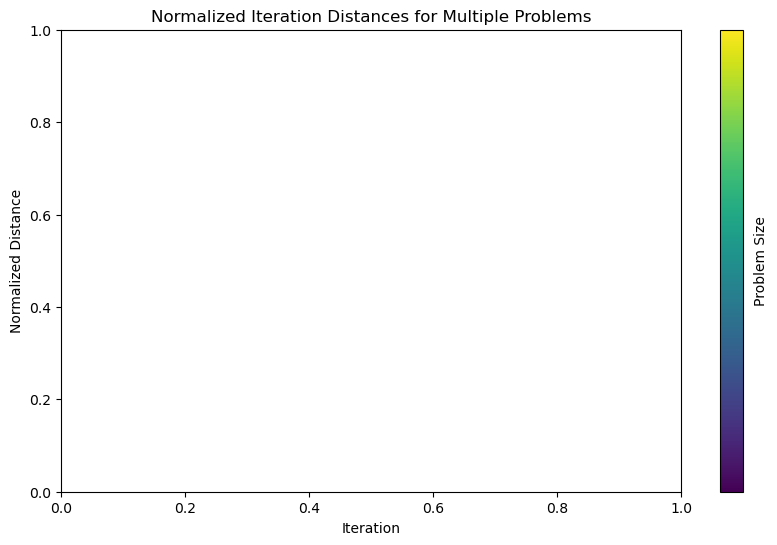

In [ ]:
params = {
    'mute_output': True,
    'num_iterations': 100,
    'return_all': True
}

iteration_distances_dict = {}
problem_sizes = {}

for prob in problems:
    distance_matrix = distance_matrices[prob]
    problem_sizes[prob] = distance_matrix.shape[0]
    all_iteration_distances = []

    for _ in range(10):
        best_tour, best_distance, iteration_distances = ant_colony(distance_matrix, params)
        all_iteration_distances.append(iteration_distances)

    # Calculate the average of iteration distances
    avg_iteration_distances = np.mean(all_iteration_distances, axis=0)
    iteration_distances_dict[prob] = avg_iteration_distances

plot_iterations(iteration_distances_dict, optimal_costs, problem_sizes)